In [533]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
import nltk
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [534]:
df = pd.read_excel('../Data/Dataset.xlsx')
df.head()

,published_date,title,text,url,medium
0,"May 1, 2019","House thief beaten to death, Butterworth","A 28-year-old Butterworth man, who was allege...",http://www.hinnews.com/za/national-news/house-...,hinnews.com
1,"May 1, 2019",Pitso Burst Into Fight With His Player Agent O...,It’s not a secret that Sibusiso Vilakazi is c...,http://www.hinnews.com/za/sports/pitso-burst-i...,hinnews.com
2,"May 1, 2019",Pretoria police caught in human trafficking an...,"According to report, Some criminals may have ...",http://www.hinnews.com/za/metro-news/pretoria-...,hinnews.com
3,"May 1, 2019",Kaizer Chiefs Players Reveals Why Chiefs Playe...,Ex-Kaizer Chiefs hardman Tinashe Nengomasha h...,http://www.hinnews.com/za/sports/kaizer-chiefs...,hinnews.com
4,"September 7, 2019",Malema and Ndlozi to be prosecuted for assault...,Lobby group AfriForum announced in a statemen...,http://www.hinnews.com/za/metro-news/malema-an...,hinnews.com


In [535]:
text = df['text']

Change to all lower case

In [536]:
text = text.str.lower()

In [537]:
text.head()

0     a 28-year-old butterworth man, who was allege...
1     it’s not a secret that sibusiso vilakazi is c...
2     according to report, some criminals may have ...
3     ex-kaizer chiefs hardman tinashe nengomasha h...
4     lobby group afriforum announced in a statemen...
Name: text, dtype: object

Removing StopWords

In [538]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trmyi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [539]:
stopWords = stopwords.words('english')
stopWords = set(stopWords)

In [540]:
stopWords.add('would')
stopWords.add('south')
stopWords.add('africa')
stopWords.add('people')
stopWords.add('one')

In [541]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopWords])

In [542]:
text = text.apply(lambda text: cleaning_stopwords(text))
text.head()

0    28-year-old butterworth man, allegedly part ga...
1    it’s secret sibusiso vilakazi contemplating le...
2    according report, criminals may infiltrated po...
3    ex-kaizer chiefs hardman tinashe nengomasha im...
4    lobby group afriforum announced statement frid...
Name: text, dtype: object

Remove Punctuations

In [543]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [544]:
text = text.apply(lambda text: cleaning_punctuations(text))
text.head()

0    28yearold butterworth man allegedly part gang ...
1    it’s secret sibusiso vilakazi contemplating le...
2    according report criminals may infiltrated pol...
3    exkaizer chiefs hardman tinashe nengomasha imp...
4    lobby group afriforum announced statement frid...
Name: text, dtype: object

Remove Emojis and URLs

In [545]:
import emoji

In [546]:
def give_emoji_free_text(text):
    """
    Removes emoji's from tweets
    Accepts:
        Text (tweets)
    Returns:
        Text (emoji free tweets)
    """
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

def url_free_text(text):
    '''
    Cleans text from urls
    '''
    text = re.sub(r'http\S+', '', text)
    return text

In [547]:
text = text.apply(lambda text: give_emoji_free_text(text))
text = text.apply(lambda text: url_free_text(text))

In [548]:
text.head()

0    28yearold butterworth man allegedly part gang ...
1    it’s secret sibusiso vilakazi contemplating le...
2    according report criminals may infiltrated pol...
3    exkaizer chiefs hardman tinashe nengomasha imp...
4    lobby group afriforum announced statement frid...
Name: text, dtype: object

Remove numbers

In [549]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [550]:
text = text.apply(lambda text: cleaning_numbers(text))
text.head()

0    yearold butterworth man allegedly part gang te...
1    it’s secret sibusiso vilakazi contemplating le...
2    according report criminals may infiltrated pol...
3    exkaizer chiefs hardman tinashe nengomasha imp...
4    lobby group afriforum announced statement frid...
Name: text, dtype: object

Remove unnecessary words

In [551]:
def cleaning_also(data):
    return re.sub("also", '', data)

In [552]:
text = text.apply(lambda text: cleaning_also(text))
text.head()

0    yearold butterworth man allegedly part gang te...
1    it’s secret sibusiso vilakazi contemplating le...
2    according report criminals may infiltrated pol...
3    exkaizer chiefs hardman tinashe nengomasha imp...
4    lobby group afriforum announced statement frid...
Name: text, dtype: object

In [553]:
def cleaning_s(data):
    return re.sub("’s", '', data)

In [554]:
text = text.apply(lambda text: cleaning_s(text))
text.head()

0    yearold butterworth man allegedly part gang te...
1    it secret sibusiso vilakazi contemplating leav...
2    according report criminals may infiltrated pol...
3    exkaizer chiefs hardman tinashe nengomasha imp...
4    lobby group afriforum announced statement frid...
Name: text, dtype: object

In [555]:
def cleaningDash(data):
    return re.sub("–", '', data)

In [556]:
text = text.apply(lambda text: cleaningDash(text))
text.head()

0    yearold butterworth man allegedly part gang te...
1    it secret sibusiso vilakazi contemplating leav...
2    according report criminals may infiltrated pol...
3    exkaizer chiefs hardman tinashe nengomasha imp...
4    lobby group afriforum announced statement frid...
Name: text, dtype: object

In [557]:
def cleaning(data):
    return re.sub("”", '', data)

In [558]:
text = text.apply(lambda text: cleaning(text))
text.head()

0    yearold butterworth man allegedly part gang te...
1    it secret sibusiso vilakazi contemplating leav...
2    according report criminals may infiltrated pol...
3    exkaizer chiefs hardman tinashe nengomasha imp...
4    lobby group afriforum announced statement frid...
Name: text, dtype: object

In [559]:
def cleaning_said(data):
    return re.sub('said', '', data)

In [560]:
text = text.apply(lambda text: cleaning_said(text))
text.head()

0    yearold butterworth man allegedly part gang te...
1    it secret sibusiso vilakazi contemplating leav...
2    according report criminals may infiltrated pol...
3    exkaizer chiefs hardman tinashe nengomasha imp...
4    lobby group afriforum announced statement frid...
Name: text, dtype: object

In [561]:
def cleaning_RT(data):
    return re.sub('anc', '', data)

In [562]:
text = text.apply(lambda text: cleaning_RT(text))
text.head()

0    yearold butterworth man allegedly part gang te...
1    it secret sibusiso vilakazi contemplating leav...
2    according report criminals may infiltrated pol...
3    exkaizer chiefs hardman tinashe nengomasha imp...
4    lobby group afriforum announced statement frid...
Name: text, dtype: object

In [563]:
textcopy = text.copy()

Tokenize

In [564]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trmyi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [565]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
C:\Users\trmyi\AppData\Local\Temp/ipykernel_15076/4204352487.py:2: DeprecationWarning: invalid escape sequence \w
  tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')


In [566]:
text = text.apply(lambda text: tokenizer.tokenize(text))

In [567]:
text.head()

0    [yearold, butterworth, man, allegedly, part, g...
1    [it, secret, sibusiso, vilakazi, contemplating...
2    [according, report, criminals, may, infiltrate...
3    [exkaizer, chiefs, hardman, tinashe, nengomash...
4    [lobby, group, afriforum, announced, statement...
Name: text, dtype: object

Stemming

In [568]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

In [569]:
text = text.apply(lambda text: stemming_on_text(text))
text.head()

0    [yearold, butterworth, man, allegedly, part, g...
1    [it, secret, sibusiso, vilakazi, contemplating...
2    [according, report, criminals, may, infiltrate...
3    [exkaizer, chiefs, hardman, tinashe, nengomash...
4    [lobby, group, afriforum, announced, statement...
Name: text, dtype: object

Lemmatize

In [570]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

In [571]:
text = text.apply(lambda text: lemmatizer_on_text(text))
text.head()

0    [yearold, butterworth, man, allegedly, part, g...
1    [it, secret, sibusiso, vilakazi, contemplating...
2    [according, report, criminals, may, infiltrate...
3    [exkaizer, chiefs, hardman, tinashe, nengomash...
4    [lobby, group, afriforum, announced, statement...
Name: text, dtype: object

Visualize

In [572]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(textcopy)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

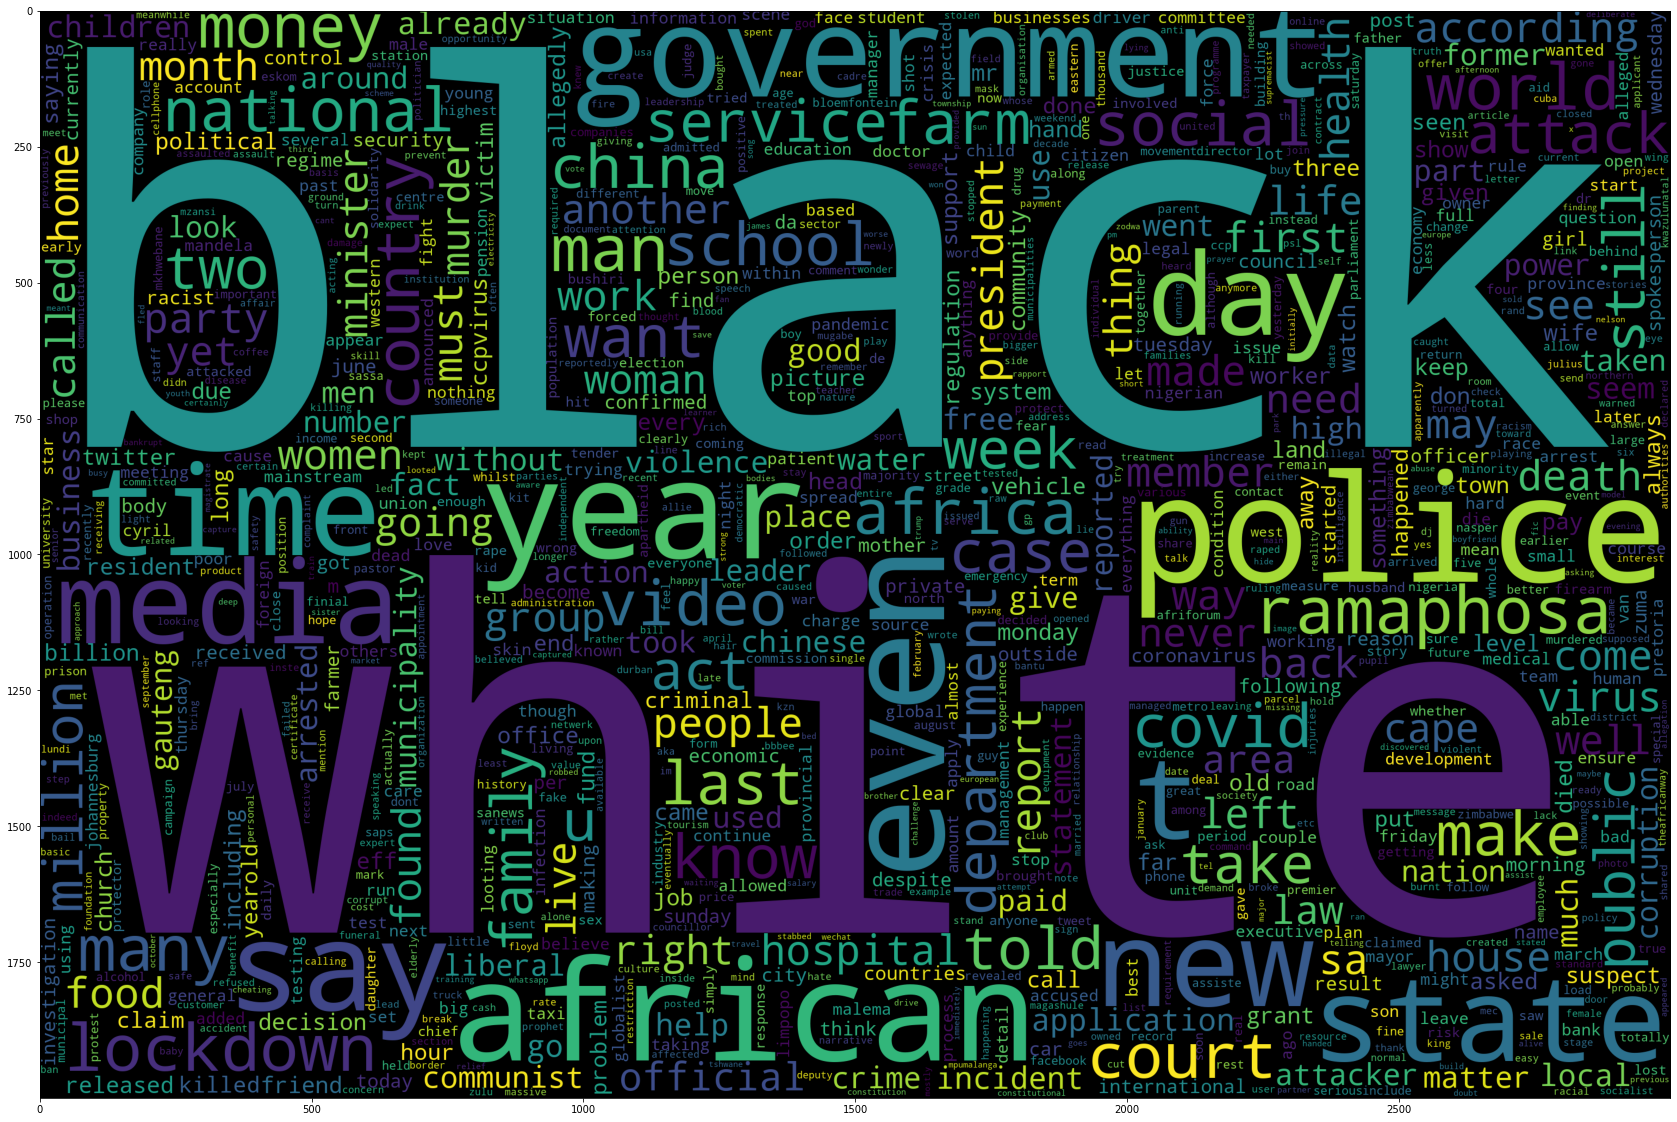

In [573]:
wc = WordCloud(max_words = 1000 , width = 3000 , height = 2000,
               collocations=False).generate(" ".join(textcopy))
plt.figure(figsize=(30,20))
plt.imshow(wc)

LDA

In [598]:
from gensim import corpora

dictionary = corpora.Dictionary(text)
corpus = [dictionary.doc2bow(tex) for tex in text]

In [599]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [600]:
import gensim
NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

In [601]:
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.010*"police" + 0.004*"act" + 0.003*"school" + 0.003*"arrested" + 0.002*"two" + 0.002*"man"')
(1, '0.006*"china" + 0.003*"african" + 0.003*"chinese" + 0.003*"ramaphosa" + 0.003*"government" + 0.003*"president"')
(2, '0.006*"r" + 0.003*"social" + 0.003*"no" + 0.003*"public" + 0.003*"applications" + 0.002*"year"')
(3, '0.008*"black" + 0.006*"white" + 0.005*"like" + 0.005*"even" + 0.004*"lockdown" + 0.004*"’t"')


In [602]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [603]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\trmyi\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
